# Reto semana 2 - Matematicas para Machine Learning

##### A. Escribimos el codigo que lee y grafica la imagen en escala de grises

In [4]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 19.0 MB/s eta 0:00:00a 0:00:01


In [1]:
# Importar librerías
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
# ponemos el path de la imagen guardada en nuestra carpeta
img_path = 'EdificioMarioLaserna.png'

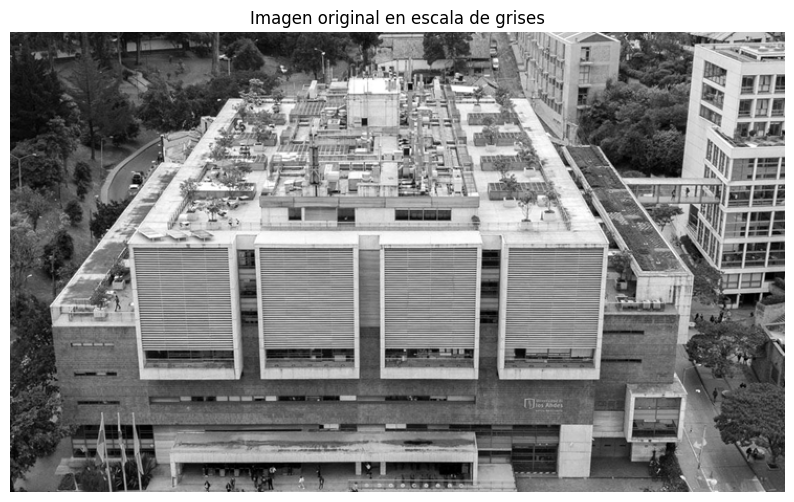

In [3]:
# leemos y mostramos la imagen
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title("Imagen original en escala de grises")
plt.axis('off')
plt.show()

##### B. calculamos las matrices usando svd de numpy

In [4]:
# Convertir a tipo float para calcular el SVD
A = np.array(img, dtype=float)

U, S, VT = np.linalg.svd(A, full_matrices=False)

##### C. Reconstruimos la imagen usando los p=10 primeros valores singulares 

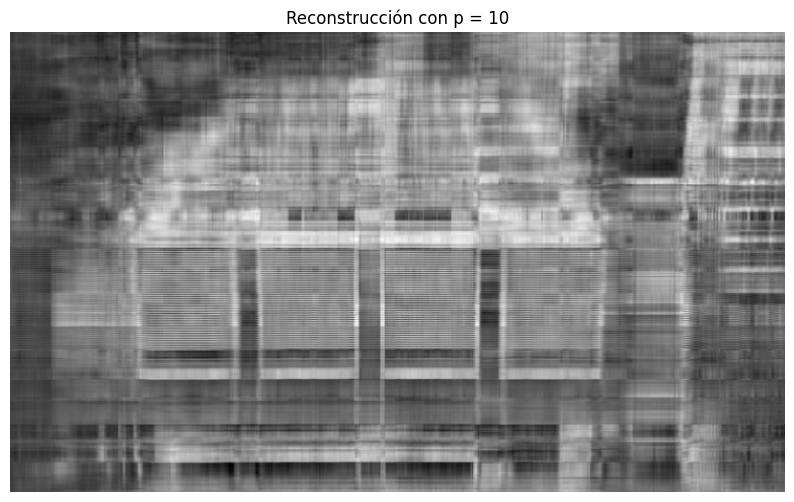

In [5]:
p = 10
Ur = U[:, :p]
Sr = np.diag(S[:p])
VTr = VT[:p, :]

Ar = Ur @ Sr @ VTr

plt.figure(figsize=(10, 6))
plt.imshow(Ar, cmap='gray')
plt.title(f"Reconstrucción con p = {p}")
plt.axis('off')
plt.show()

##### D. Exploramos con diferentes valores de p 

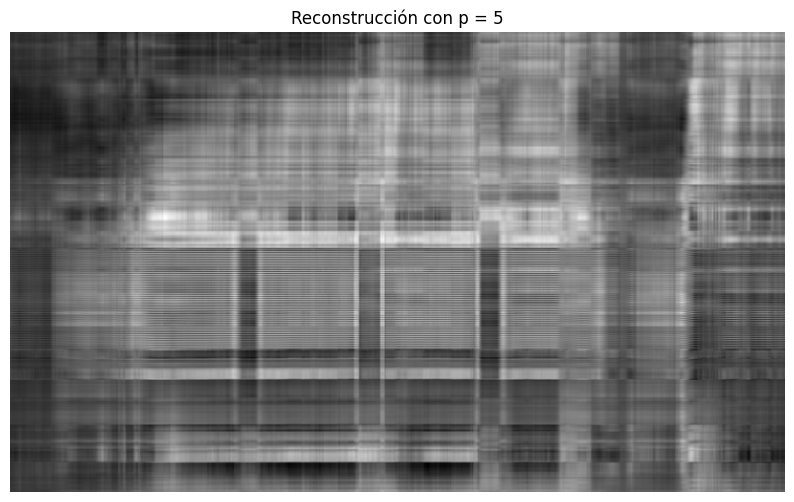

Tamaño original: 324860 elementos
Tamaño comprimido: 5920 elementos
Nivel de compresión: 1.82% del original


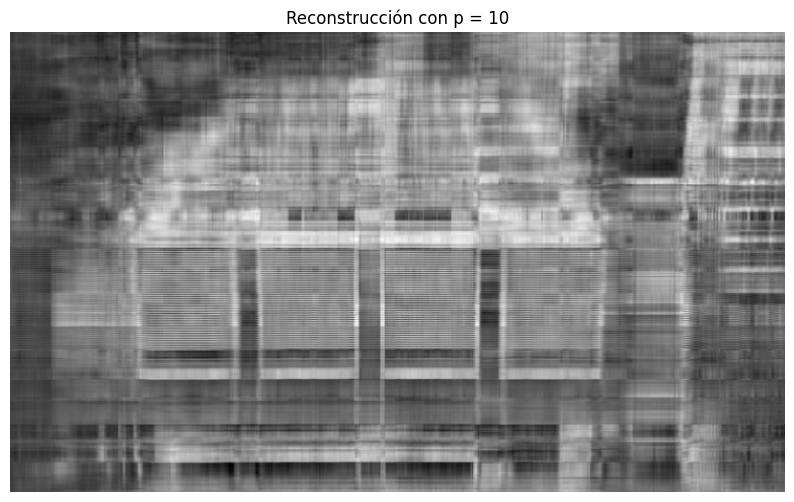

Tamaño original: 324860 elementos
Tamaño comprimido: 11890 elementos
Nivel de compresión: 3.66% del original


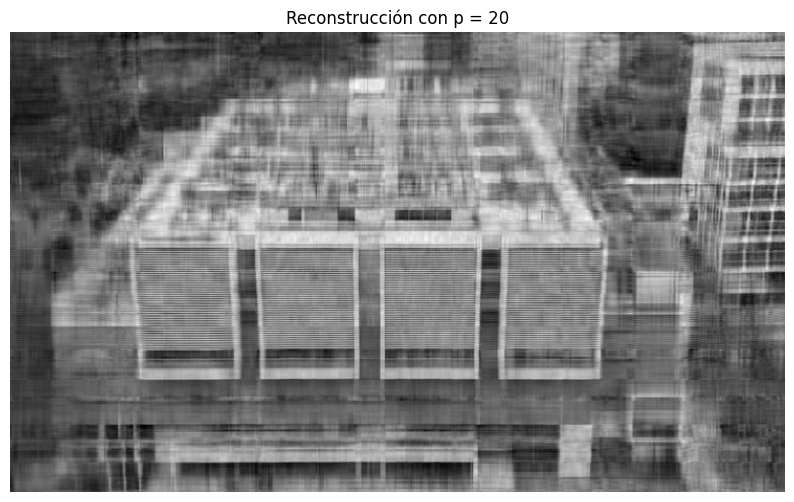

Tamaño original: 324860 elementos
Tamaño comprimido: 23980 elementos
Nivel de compresión: 7.38% del original


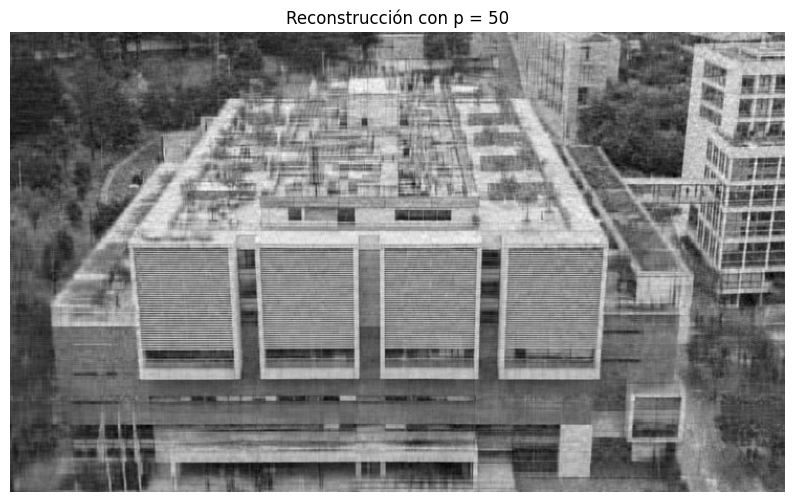

Tamaño original: 324860 elementos
Tamaño comprimido: 61450 elementos
Nivel de compresión: 18.92% del original


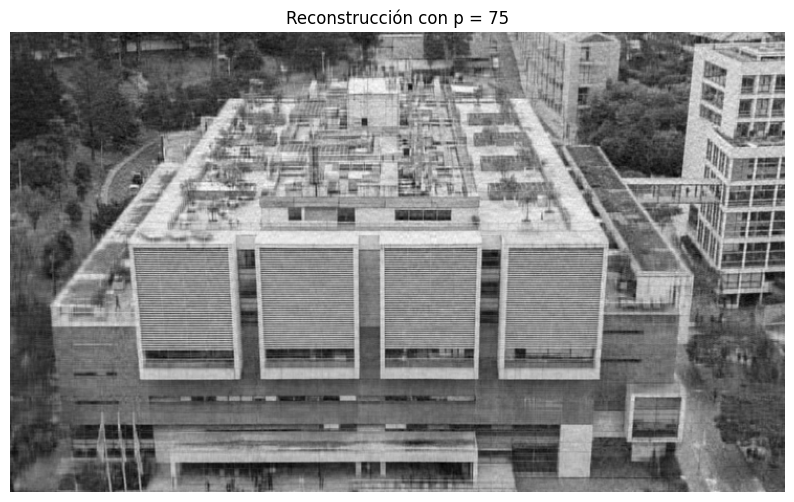

Tamaño original: 324860 elementos
Tamaño comprimido: 94050 elementos
Nivel de compresión: 28.95% del original


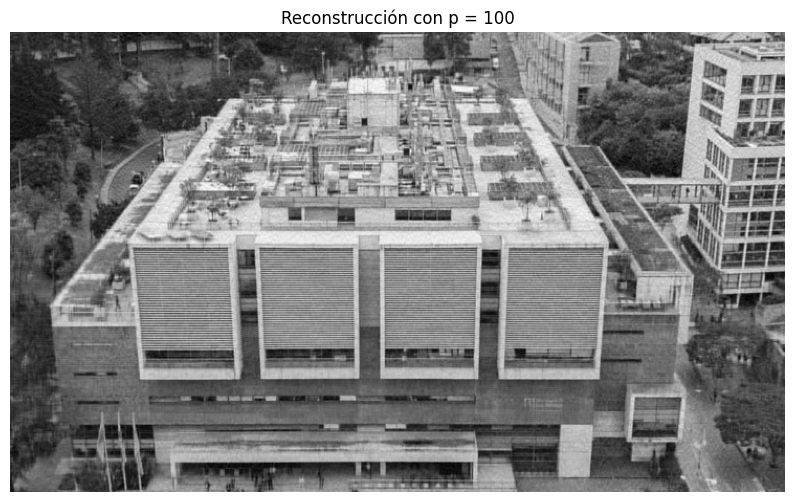

Tamaño original: 324860 elementos
Tamaño comprimido: 127900 elementos
Nivel de compresión: 39.37% del original


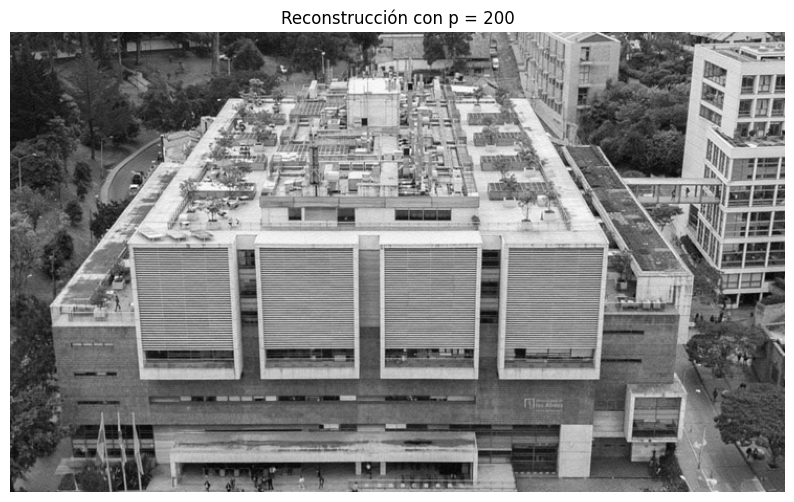

Tamaño original: 324860 elementos
Tamaño comprimido: 275800 elementos
Nivel de compresión: 84.90% del original


In [7]:
def reconstruir_y_graficar(p):
    Ur = U[:, :p]
    Sr = np.diag(S[:p])
    VTr = VT[:p, :]
    Ar = Ur @ Sr @ VTr

    plt.figure(figsize=(10, 6))
    plt.imshow(Ar, cmap='gray')
    plt.title(f"Reconstrucción con p = {p}")
    plt.axis('off')
    plt.show()

    original_size = A.size
    compressed_size = Ur.size + Sr.size + VTr.size
    compression_ratio = 100 * compressed_size / original_size
    print(f"Tamaño original: {original_size} elementos")
    print(f"Tamaño comprimido: {compressed_size} elementos")
    print(f"Nivel de compresión: {compression_ratio:.2f}% del original")

# Ejemplo visual con diferentes valores de p
for p in [5, 10, 20, 50, 75, 100, 200]:
    reconstruir_y_graficar(p)

### Analisis de p

Se planteo primeramente que un p = 50 pasa la prueba visual, pero se ingreso el valor de 75 posteriormente para identificar que en este si ya no hay tantos elementos borrosos en la imagen, los datos especificos del analisis son los siguientes:

Tamaño original: 324860 pixeles

Tamaño comprimido: 94050 pixeles

Nivel de compresión: 28.95% del original


### Segunda imagen

Utilizamos una segunda imagen, en este caso una cara, se plantea que con una sola imagen, incluso dos es muy dificil definir un p que sea estandar para utilizar un script local para comprimir todo tipo de imagenes


--- Segunda imagen: face.jpeg ---



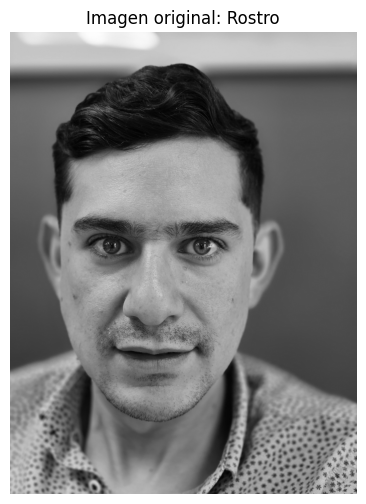

TypeError: reconstruir_y_graficar() takes 1 positional argument but 5 were given

In [9]:
# --- Segunda imagen: face.jpeg ---
print("\n--- Segunda imagen: face.jpeg ---\n")

# Leer y mostrar la imagen
img2 = cv2.imread("face.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 6))
plt.imshow(img2, cmap='gray')
plt.title("Imagen original: Rostro")
plt.axis('off')
plt.show()

# Convertir a matriz float
A2 = np.array(img2, dtype=float)

# SVD
U2, S2, VT2 = np.linalg.svd(A2, full_matrices=False)

# Probar con distintos valores de p
for p in [5, 10, 20, 50, 75, 100, 150, 200]:
    reconstruir_y_graficar(p, U2, S2, VT2, A2)